# Handwritten digits classification using Neural network

In this notebook we will classify handwritten digits using a sample neural network which has only input and output layers. We will then add a hidden layer and see how the performance of the model improves.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# loading handwritten dataset from keras and load this into train and test dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

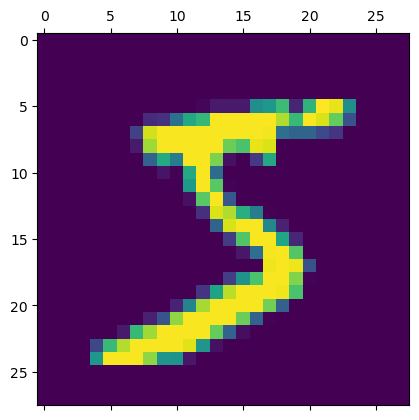

In [7]:
plt.matshow(x_train[0])   # at 0th index no. 5 is present

In [8]:
y_train[0]

5

In [9]:
x_train = x_train / 255
x_test = x_test / 255

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
x_train.shape  # it shows total 60000 samples and 28 is the dimension of each sample

(60000, 28, 28)

In [12]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [13]:
x_train_flattened.shape

(60000, 784)

In [14]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Very simple neural network with no hidden layers

In [15]:
model = keras.Sequential([
    # Dense means neurons of one layer is connected with every other neuron of second layer
    # here 10 neurons are the output (0 to 9) and input neuron is 784
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
# compiling neural network (optimizer allows us to train efficiently)
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)   # epochs is no. of iterations for which our neural network is going to run the training

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4739 - accuracy: 0.8765
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3042 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2839 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9254


<b> from above training the dataset we can clearly see that as the time goes the loss decreases and accuracy increases </b>

In [16]:
# Evaluating accuracy on test dataset
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2665 - accuracy: 0.9264


[0.2665494680404663, 0.9264000058174133]

In [17]:
# predicting x_test_flattened
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.71051843e-02, 3.23899570e-07, 5.51769622e-02, 9.58172441e-01,
       3.38725187e-03, 1.01757534e-01, 2.14923011e-06, 9.99704361e-01,
       1.32823735e-01, 7.10581124e-01], dtype=float32)

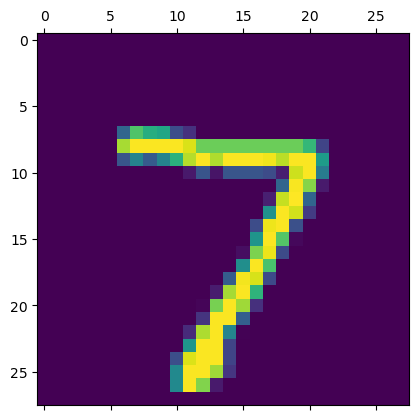

In [18]:
plt.matshow(x_test[0])

<b> np.argmax finds a maximum element from an array and returns the index of it</b>

In [19]:
np.argmax(y_predicted[0])

7

In [20]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [22]:
# from above we can see y_predicted_labels matches the truth data i.e. our test datset
# making a confusion matrix
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    0,    2,    0,    4,   11,    2,    1,    1],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   5,    9,  923,   18,   10,    2,   13,   10,   38,    4],
       [   1,    0,   15,  934,    2,   15,    3,    9,   19,   12],
       [   1,    1,    2,    2,  918,    0,   12,    4,    9,   33],
       [  10,    3,    2,   40,   11,  763,   18,    6,   31,    8],
       [   9,    3,    4,    1,    8,   11,  919,    2,    1,    0],
       [   1,    6,   22,    7,   11,    1,    0,  935,    2,   43],
       [   6,    7,    7,   24,   10,   23,   10,    7,  869,   11],
       [  11,    7,    1,   11,   27,    5,    0,    8,    7,  932]])>

Text(95.72222222222221, 0.5, 'Truth')

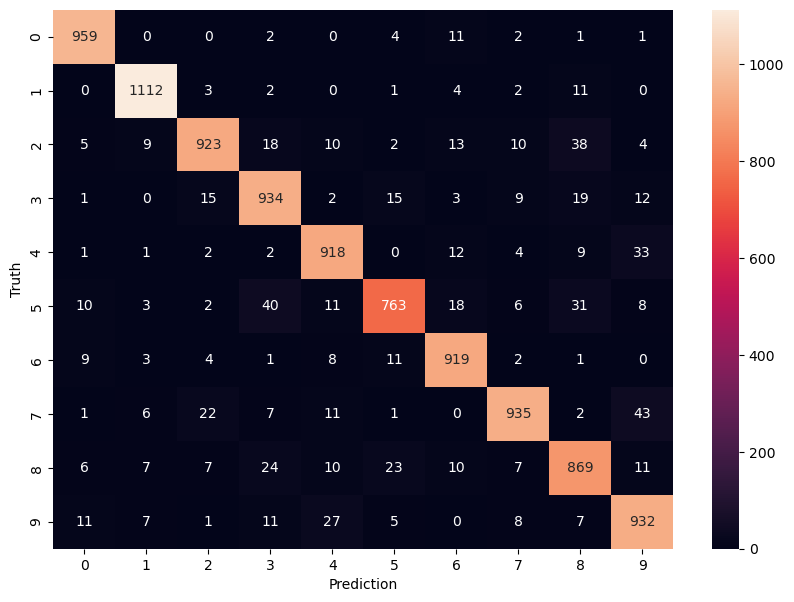

In [23]:
import seaborn as sns
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

## Using Hidden layer

In [24]:
model = keras.Sequential([
    # Dense means neurons of one layer is connected with every other neuron of second layer
    # here 100 is no. of hidden layers which should be less than input shape i.e. 784
    # here 10 neurons are the output (0 to 9) and input neuron is 784
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
# compiling neural network (optimizer allows us to train efficiently)
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)     # epochs is no. of iterations for which our neural network is going to run the training

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2714 - accuracy: 0.9229
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1224 - accuracy: 0.9640
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0849 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0652 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0507 - accuracy: 0.9844


In [25]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0766 - accuracy: 0.9768


[0.07660327106714249, 0.9768000245094299]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

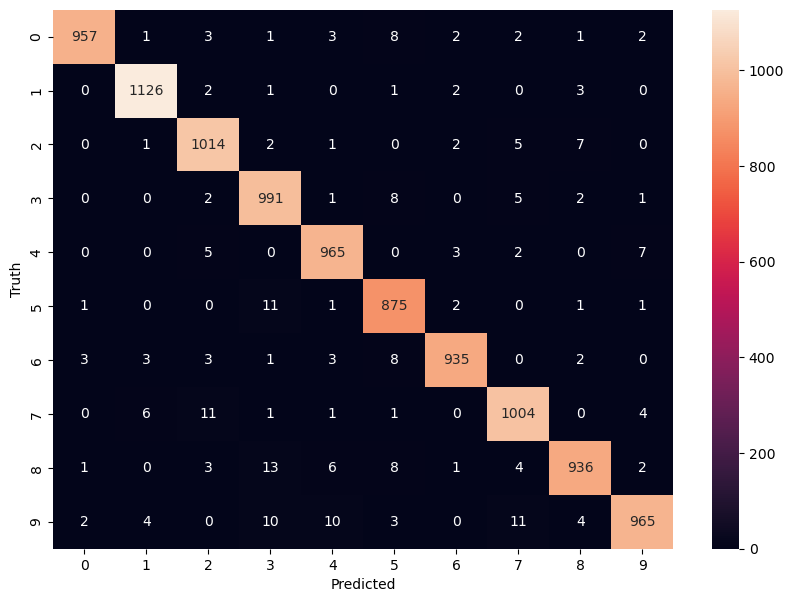

In [26]:
y_predicted = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using Flatten layer so that we don't have to call .reshape on input dataset

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2784 - accuracy: 0.9211
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1256 - accuracy: 0.9634
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0877 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0676 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0542 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0428 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0359 - accuracy: 0.9887
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0300 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0256 - accuracy: 0.9922
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.020

In [28]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0777 - accuracy: 0.9782


[0.0776946097612381, 0.9782000184059143]